# Building an image clf using the sequential api

## Load the data

In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2023-07-24 19:10:05.445161: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.12.0
2.12.0


In [3]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()
print(X_train_full.shape)
print(X_train_full.dtype)
# already split into train- and test- set.

(60000, 28, 28)
uint8


In [4]:
# scale input
# uint8 -> 0-1 float
X_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

In [5]:
# class names (see doc)
# | Label | Description |
# |:-----:|-------------|
# |   0   | T-shirt/top |
# |   1   | Trouser     |
# |   2   | Pullover    |
# |   3   | Dress       |
# |   4   | Coat        |
# |   5   | Sandal      |
# |   6   | Shirt       |
# |   7   | Sneaker     |
# |   8   | Bag         |
# |   9   | Ankle boot  |
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(f"The 1st class name is {class_names[y_train[0]]}.")

The 1st class name is Coat.


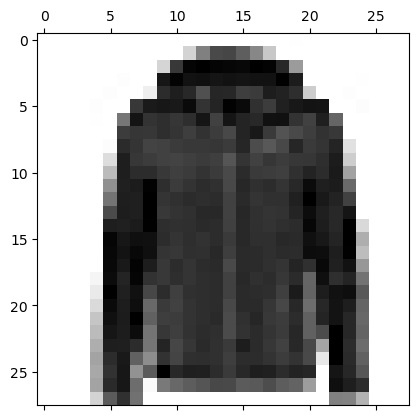

Class name: Coat.


In [6]:
# show one picture
import matplotlib.pyplot as plt
plt.matshow(1-X_train[0]);plt.gray();plt.show()
print(f"Class name: {class_names[y_train[0]]}.")

## Create the model using the Sequential API

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28))) # This is alternative to:
# keras.layers.InputLayer(input_shape=(28,28));
# keras.layers.Flatten().
model.add(keras.layers.Dense(300,activation="relu"))
# Equiv to keras.activations.relu
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))
# Equiv to:
# model = keras.models.Sequential([
#  keras.layers.Flatten(input_shape=[28, 28]),
#  keras.layers.Dense(300, activation="relu"),
#  keras.layers.Dense(100, activation="relu"),
#  keras.layers.Dense(10, activation="softmax")
# ])

2023-07-24 19:10:07.958666: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.layers

In [10]:
hidden1=model.layers[1]
hidden1.name

'dense'

In [11]:
hidden1.get_config()

{'name': 'dense',
 'trainable': True,
 'dtype': 'float32',
 'units': 300,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [12]:
# if we can get a layer?
model.get_layer('dense') is hidden1

True

In [13]:
weights,biases=hidden1.get_weights()
print(f"weights: {weights};\nshape: {weights.shape};\nbiases: {biases};\nshape: {biases.shape}.")

weights: [[ 0.07123506  0.03765348  0.03229378 ...  0.02016892 -0.04602576
  -0.0440255 ]
 [ 0.06580068 -0.06455334  0.03527339 ...  0.03741653 -0.01540487
  -0.06557801]
 [ 0.0355837  -0.01960359 -0.02818713 ...  0.00113522 -0.03870999
  -0.0429562 ]
 ...
 [-0.05437057 -0.06676223 -0.01574965 ...  0.02520808  0.06219514
  -0.07265377]
 [-0.01838454 -0.0059527   0.0375706  ... -0.06907331 -0.07113933
   0.07005149]
 [-0.03814141 -0.00729521  0.02443822 ... -0.02869406 -0.00093823
  -0.00720593]];
shape: (784, 300);
biases: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [14]:
# kernel is another name for conn weights
# kernel_initializer or bias_initializer can be set (discuss in the future)

if you do not specify the input shape, it’s OK: Keras will simply wait until it knows the input shape before it actually builds the model. This will happen either when you feed it actual data (e.g., during training), or when you call its build() method. Until the model is really built, the layers will not have any weights, and you will not be able to do certain things (such as print the model summary or save the model). So, if you know the input shape when creating the model, it is best to specify it.

## Compile the model

In [15]:
model.compile(optimizer=keras.optimizers.SGD(),loss=keras.losses.SparseCategoricalCrossentropy(),metrics=[keras.metrics.sparse_categorical_accuracy])
# Keras will measure the loss and the extra metrics on this set at the end of each epoch, which is very useful to see how well the model really performs.
# sgd: autodiff.
# set learning rate `SGD(lr=...)`. Default -> 0.01.

## Train and evaluate the model

In [16]:
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7106 - sparse_categorical_accuracy: 0.7637 - val_loss: 0.5019 - val_sparse_categorical_accuracy: 0.8326
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4854 - sparse_categorical_accuracy: 0.8313 - val_loss: 0.4625 - val_sparse_categorical_accuracy: 0.8442
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4438 - sparse_categorical_accuracy: 0.8429 - val_loss: 0.4509 - val_sparse_categorical_accuracy: 0.8436
Epoch 4/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4156 - sparse_categorical_accuracy: 0.8553 - val_loss: 0.4015 - val_sparse_categorical_accuracy: 0.8610
Epoch 5/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3961 - sparse_categorical_accuracy: 0.8617 - val_loss: 0.3914 - val_sparse_categorical_accuracy: 0.8638
Epoch 6/30
1719/1719 [==============================] - 18s 10ms/step - loss: 0.3795 - 

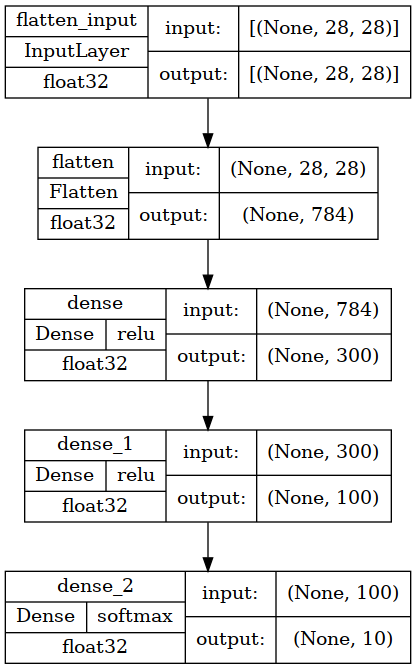

In [2]:
keras.utils.plot_model(model,show_shapes=True,show_dtype=True,show_layer_activations=True)

In [5]:
# history.history contains loss and extra metrics
history.history['val_sparse_categorical_accuracy']

[0.8325999975204468,
 0.8442000150680542,
 0.8435999751091003,
 0.8610000014305115,
 0.8637999892234802,
 0.8695999979972839,
 0.8723999857902527,
 0.8726000189781189,
 0.8700000047683716,
 0.8727999925613403,
 0.8730000257492065,
 0.8817999958992004,
 0.883400022983551,
 0.8827999830245972,
 0.8820000290870667,
 0.8848000168800354,
 0.8884000182151794,
 0.8873999714851379,
 0.8712000250816345,
 0.8831999897956848,
 0.8841999769210815,
 0.8870000243186951,
 0.8873999714851379,
 0.8902000188827515,
 0.8916000127792358,
 0.8848000168800354,
 0.8894000053405762,
 0.8898000121116638,
 0.8916000127792358,
 0.8895999789237976]

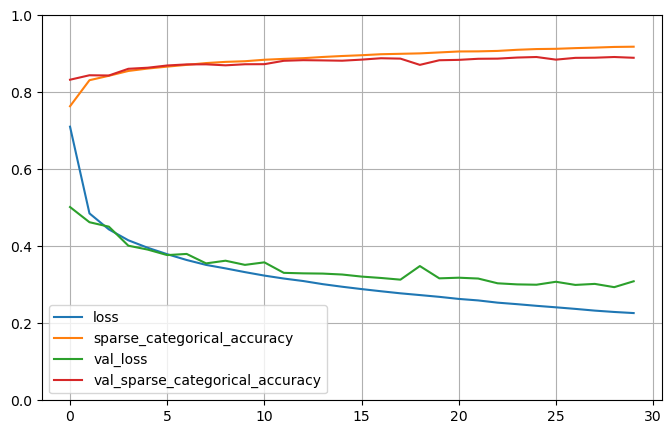

In [7]:
# plot learning curve
# pandas -> Dataframe(history.history).plot()
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.ylim((0,1))
plt.show()
# loss is the running meaning during epoch.
# Training curve should be shifted by half an epoch to the left.

In [8]:
# Let's keep training
history1=model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2226 - sparse_categorical_accuracy: 0.9197 - val_loss: 0.3163 - val_sparse_categorical_accuracy: 0.8852
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2191 - sparse_categorical_accuracy: 0.9211 - val_loss: 0.2929 - val_sparse_categorical_accuracy: 0.8910
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2158 - sparse_categorical_accuracy: 0.9223 - val_loss: 0.2957 - val_sparse_categorical_accuracy: 0.8928
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2126 - sparse_categorical_accuracy: 0.9244 - val_loss: 0.2943 - val_sparse_categorical_accuracy: 0.8952
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2088 - sparse_categorical_accuracy: 0.9245 - val_loss: 0.3057 - val_sparse_categorical_accuracy: 0.8926
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2052 - s

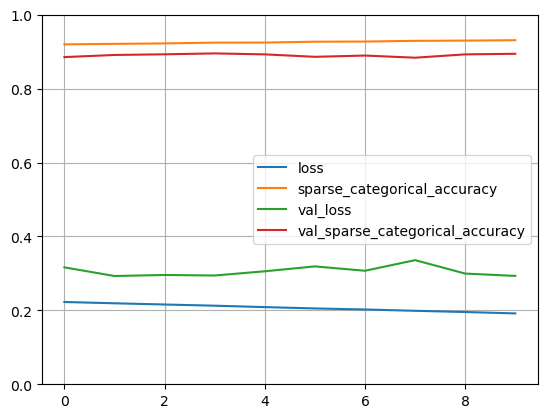

In [14]:
# extend curve
pd.DataFrame(history1.history).plot();plt.grid()
plt.ylim((0,1));plt.show()

In [16]:
model.evaluate(X_test/255.0,y_test)

313/313 [==============================] - 8s 24ms/step - loss: 0.3257 - sparse_categorical_accuracy: 0.8861


[0.32574155926704407, 0.8860999941825867]

## Use the model to make predictions

In [17]:
X_new=X_test[:3]
y_proba=model.predict(X_new)
# it returns probas not classes.
y_proba.round(2)

1/1 [==============================] - 0s 85ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
import numpy as np
y_pred=np.array(list(map(np.argmax,y_proba)))
y_pred

array([9, 2, 1])

In [25]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

<Figure size 640x480 with 0 Axes>

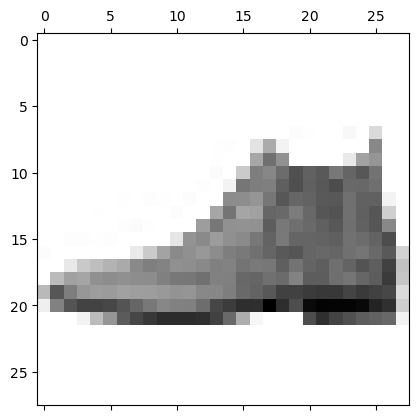

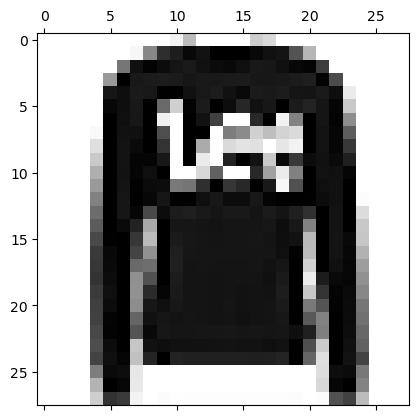

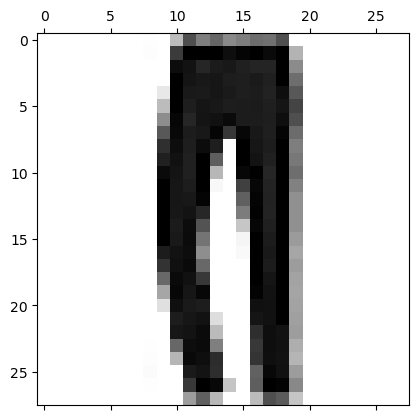

In [31]:
plt.gray()
for mat in X_new:
    plt.matshow(255-mat)
plt.show()

In [32]:
# import dill
# dill.dump_session('session.tmp')